----
#### <b>Name : Ayodya W.K.H</b>
#### <b>Index No : 190065K</b>
----

##### <b>Question 1</b>

train_images.shape:  (60000, 32, 32)
train_labels.shape:  (60000,)
test_images.shape: (10000, 32, 32)
test_labels.shape: (10000,)


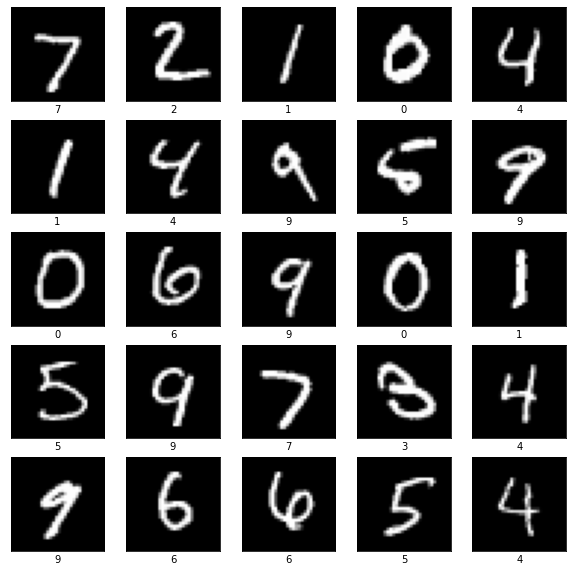

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Padding
paddings = tf.constant([[0, 0], [2, 2], [2, 2]])
train_images = tf.pad(train_images, paddings, constant_values=0)
test_images = tf.pad(test_images, paddings, constant_values=0)

print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

train_images = tf.dtypes.cast(train_images, tf.float32)
test_images = tf.dtypes.cast(test_images, tf.float32)
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.reshape(test_images[i], [32,32]), cmap = plt.cm.gray)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(16,(5,5),activation='relu'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(84,activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
print(model.summary())

model.fit(train_images,train_labels,epochs=5)
test_loss,test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 120)              

##### <b>Question 2</b>

In [4]:
# for CIFAR10
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, mnist
import tensorflow as tf
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation = 'relu',input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))

model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])
print(model.summary)

model.fit(train_images,train_labels,epochs = 5)
test_loss, test_accuracy = model.evaluate(test_images,test_labels,verbose = 2)
print(test_accuracy)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000025A40CAE790>>
Epoch 1/5
1563/1563 [==============================] - 56s 33ms/step - loss: 1.5525 - accuracy: 0.4281
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2027 - accuracy: 0.5718
Epoch 3/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0375 - accuracy: 0.6351
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9260 - accuracy: 0.6769
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8425 - accuracy: 0.7052
313/313 - 4s - loss: 0.9641 - accuracy: 0.6688 - 4s/epoch - 13ms/step
0.6687999963760376


##### <b>Question 3</b>

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Padding
paddings = tf.constant([[0, 0], [2, 2], [2, 2]])
train_images = tf.pad(train_images, paddings, constant_values=0)
test_images = tf.pad(test_images, paddings, constant_values=0)

print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

train_images = tf.dtypes.cast(train_images, tf.float32)
test_images = tf.dtypes.cast(test_images, tf.float32)
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0


model_base = models.Sequential()
model_base.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape = (32,32,1)))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Conv2D(64,(3,3),activation ='relu'))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Conv2D(64,(3,3),activation ='relu'))
model_base.add(layers.Flatten())
model_base.add(layers.Dense(64,activation ='relu'))
model_base.add(layers.Dense(10))
model_base.compile(optimizer = keras.optimizers.Adam(), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
print(model_base.summary())

model_base.fit(train_images,train_labels,epochs = 2)
test_loss,test_accuracy = model_base.evaluate(test_images,test_labels,verbose=2)
model_base.save_weights("saved_weights/")

train_images.shape:  (60000, 32, 32)
train_labels.shape:  (60000,)
test_images.shape: (10000, 32, 32)
test_labels.shape: (10000,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 64)          3

##### <b>Question 4</b>

In [18]:
model_lw = models.Sequential()
model_lw.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape = (32,32,1)))
model_lw.add(layers.MaxPool2D((2,2)))
model_lw.add(layers.Conv2D(64,(3,3),activation ='relu'))
model_lw.add(layers.MaxPool2D((2,2)))
model_lw.add(layers.Conv2D(64,(3,3),activation ='relu'))
model_lw.add(layers.Flatten())
model_lw.add(layers.Dense(64,activation ='relu'))
model_lw.add(layers.Dense(10))
model_lw.compile(optimizer = keras.optimizers.Adam(), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
print(model_lw.summary())

model_lw.save_weights("saved_weights/")
model_lw.fit(train_images,train_labels,epochs=2)
test_loss,test_accuracy = model_lw.evaluate(test_images, test_labels, verbose = 2)
model_lw.save("saved_model")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


##### <b>Question 5</b>

In [19]:
# loading the model
model_ld = keras.models.load_model('saved_model/')
print(model_ld.summary())
model_ld.evaluate(test_images,test_labels, verbose=2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

[0.03131040185689926, 0.9904000163078308]

##### <b>Question 6</b>

In [20]:
base_inputs = model_ld.layers[0].input
base_outputs = model_ld.layers[-2].output
output= layers.Dense(10)(base_outputs)

new_model = keras.Model(inputs = base_inputs,outputs=output)
new_model.compile(optimizer = keras.optimizers.Adam(), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
print(new_model.summary())

new_model.fit(train_images,train_labels,epochs = 2,verbose = 2)
new_model.evaluate(test_images,test_labels,verbose = 2)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16_input (InputLayer  [(None, 32, 32, 1)]      0         
 )                                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                           

[0.0357273668050766, 0.9891999959945679]

##### <b>Question 7</b>

In [21]:
#transfer learning
model_for_tl = keras.models.load_model("saved_model")
model_for_tl.trainable = False
for layer in model_for_tl.layers:
    assert layer.trainable == False
base_inputs = model_for_tl.layers[0].input
base_outputs = model_for_tl.layers[-2].output
output = layers.Dense(10)(base_outputs)

new_model = keras.Model(inputs = base_inputs, outputs = output)
new_model.compile(optimizer = keras.optimizers.Adam(),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
print(new_model.summary())

new_model.fit(train_images,train_labels,epochs = 2,verbose = 2)
new_model.evaluate(test_images,test_labels,verbose = 2)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16_input (InputLayer  [(None, 32, 32, 1)]      0         
 )                                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                           

[0.02853386290371418, 0.9909999966621399]

##### <b>Question 8</b>

In [26]:
resnet_model = keras.applications.resnet_v2.ResNet50V2()

resnet_model.trainable = False
for layer in resnet_model.layers:
    assert layer.trainable == False

base_innputs = resnet_model.layers[0].input
base_ouputs = resnet_model.layers[-2].output
output = layers.Dense(5)(base_ouputs)

resnet_model = keras.Model(inputs = base_innputs, outputs = output)
resnet_model.compile(optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'])
print(resnet_model.summary())

train_images = np.random.randint(0,256,(1000,224, 224, 3))
train_labels = np.random.randint(0,5,1000)

resnet_model.fit(train_images,train_labels,epochs = 3,verbose = 2)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            